## Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

URL to Download the data: https://drive.google.com/file/d/1fuFurVV8rcrVTAFPjhQvzGLNdnTi1jWZ/view

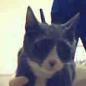

In [2]:
data_directory = 'data/CATS_DOGS/'

with Image.open(data_directory + "test/CAT/10107.jpg") as img:
    display(img)

## Creating List of Image File Names

In [3]:
image_names = []

for folder, subfolder, filenames in os.walk(data_directory):
    for image in filenames:
        image_names.append(folder+'/'+image)

In [4]:
len(image_names)

24994

## Creating DataFrame

In [5]:
image_sizes = []
rejected_images = []

for item in image_names:
    try:
        with Image.open(item) as img:
            image_sizes.append(img.size)
    except:
        rejected_images.append(item)

In [6]:
len(image_sizes)

24994

In [7]:
len(rejected_images)

0

In [8]:
df = pd.DataFrame(data=image_sizes, columns=['width', 'height'])
df.head()

,width,height
0,431,360
1,500,375
2,500,471
3,500,375
4,320,240


In [9]:
df.describe()

,width,height
count,24994.000000,24994.000000
mean,404.493518,361.037129
std,108.941802,96.936811
min,42.000000,33.000000
25%,323.000000,302.000000
50%,448.000000,375.000000
75%,500.000000,421.000000
max,500.000000,500.000000


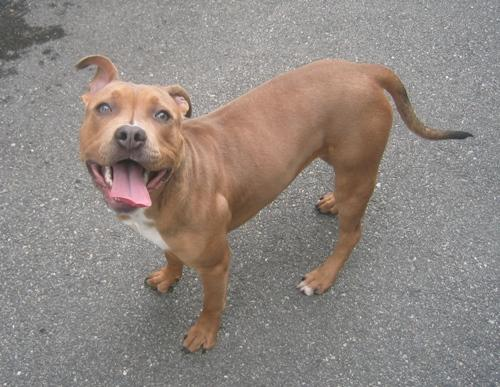

In [10]:
dog = Image.open(data_directory + "train/DOG/14.jpg")
display(dog)

In [11]:
dog.size

(500, 387)

In [12]:
dog.getpixel((0,0))

(90, 95, 98)

## Transformation

### Tensor Transformation

In [13]:
transform = transforms.Compose([
    transforms.ToTensor()
])

img = transform(dog)
print(type(img))
print(img.shape)

<class 'torch.Tensor'>
torch.Size([3, 387, 500])


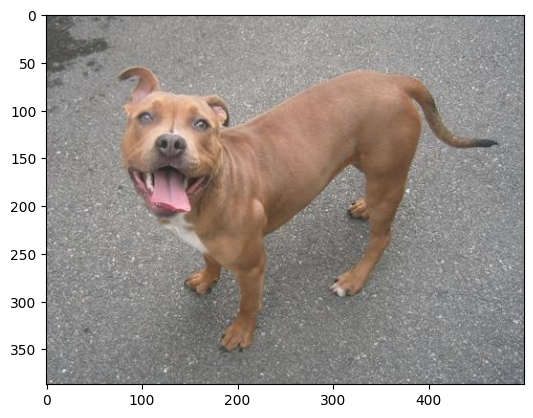

In [14]:
plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))

In [15]:
img[:, 0, 0]

tensor([0.3529, 0.3725, 0.3843])

In [16]:
np.array((90, 95, 98)) / 255

array([0.35294118, 0.37254902, 0.38431373])

### Resize Transformation

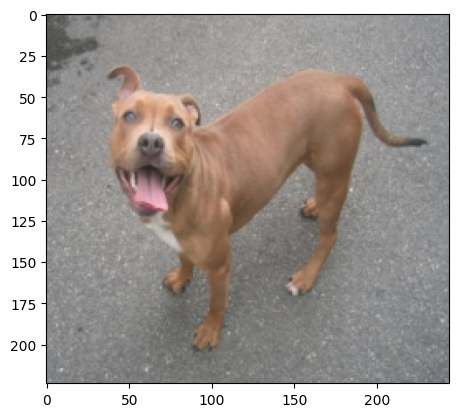

In [17]:
transform = transforms.Compose([
    transforms.Resize((224, 244)),
    transforms.ToTensor()
])

img = transform(dog)
plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))

### Central Crop Transformation

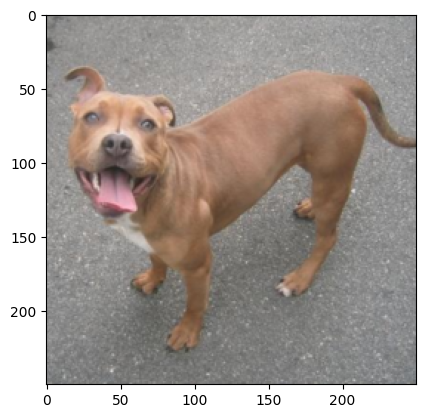

In [18]:
transform = transforms.Compose([
    transforms.Resize(250),
    transforms.CenterCrop(250),
    transforms.ToTensor()
])

img = transform(dog)
plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))

### Random Horizontal Flip Transformation

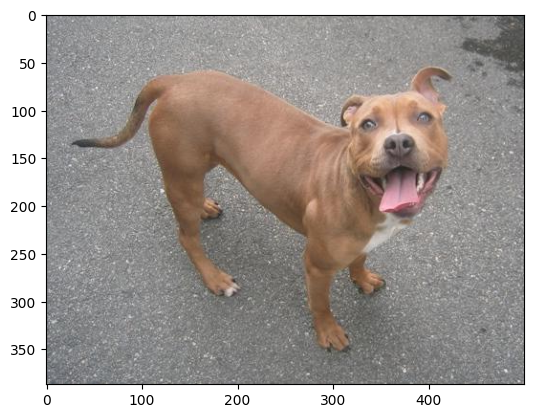

In [19]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),
    transforms.ToTensor()
])

img = transform(dog)
plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))

### Random Rotation Transformation

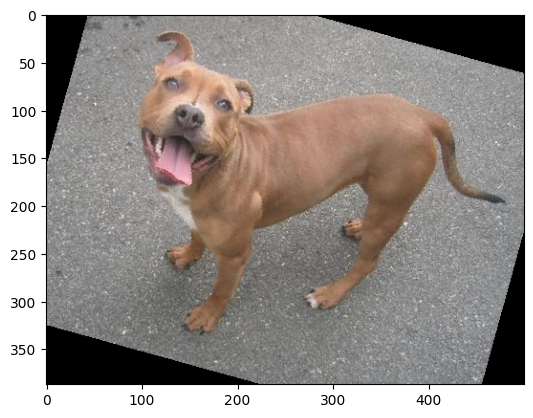

In [20]:
transform = transforms.Compose([
    transforms.RandomRotation(degrees=30),
    transforms.ToTensor()
])

img = transform(dog)
plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))

### Combined Transformations

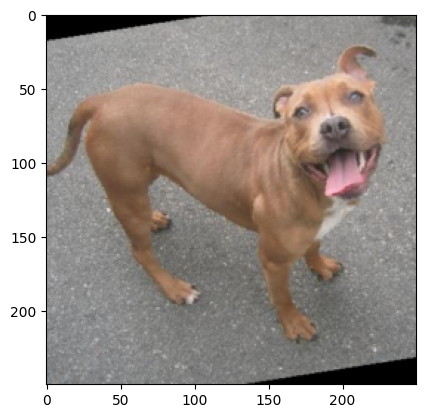

In [21]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),
    transforms.RandomRotation(degrees=30),
    transforms.Resize(250),
    transforms.CenterCrop(250),
    transforms.ToTensor()
])

img = transform(dog)
plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))

### Normalize Transformation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.5805322..2.5528543].


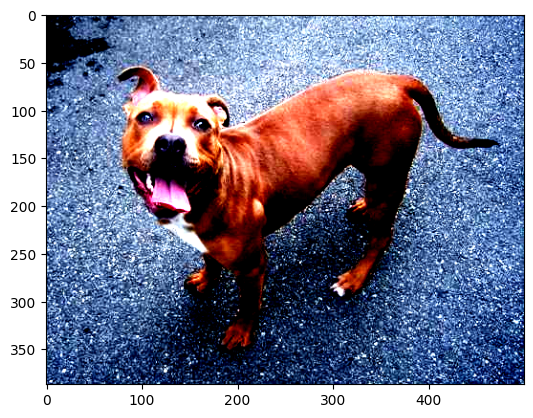

In [22]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

img = transform(dog)
plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))

### Inverse Normalization Transformation

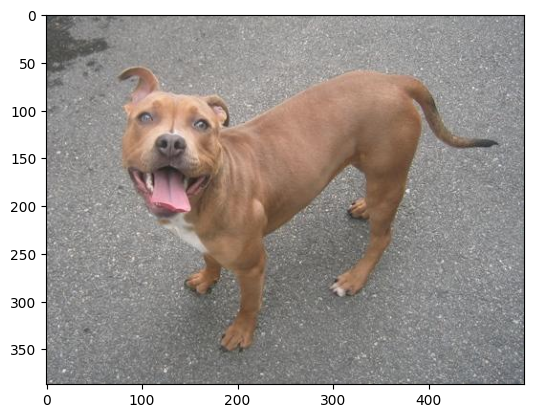

In [23]:
inverse_transform = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)

inverse_img = inverse_transform(img)
plt.imshow(np.transpose(inverse_img.numpy(), (1, 2, 0)))